___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
<center>*Copyright Pierian Data 2017*</center>
<center>*For more information, visit us at www.pieriandata.com*</center>

# Rolling and Expanding

A very common process with time series is to create data based off of a rolling mean (**moving average**). Let's show you how to do this easily with pandas!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Best way to read in data with time series index!
df = pd.read_csv('time_data/walmart_stock.csv',index_col='Date',parse_dates=True)

In [3]:
df.head(10)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215
2012-01-10,59.430000,59.709999,58.980000,59.040001,6907300,51.494109
2012-01-11,59.060001,59.529999,59.040001,59.400002,6365600,51.808098
2012-01-12,59.790001,60.000000,59.400002,59.500000,7236400,51.895316
2012-01-13,59.180000,59.610001,59.009998,59.540001,7729300,51.930204


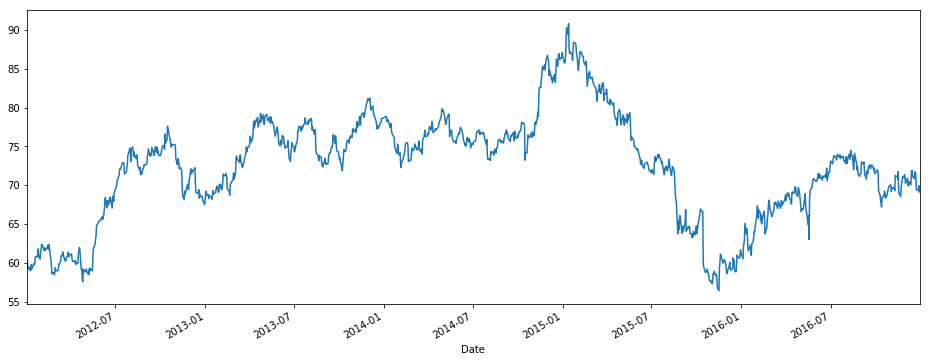

In [4]:
df['Open'].plot(figsize=(16,6))

Now let's add in a rolling mean! This rolling method provides row entries, where every entry is then representative of the window. 

In [5]:
# 7 day rolling mean
df.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,59.495714,59.895714,59.074285,59.440000,9.007414e+06,51.842984
2012-01-12,59.469999,59.744285,59.007143,59.321429,8.231357e+06,51.739567
2012-01-13,59.322857,59.638571,58.941428,59.297143,7.965071e+06,51.718386


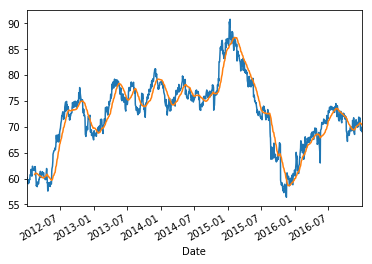

In [6]:
df['Open'].plot()
df.rolling(window=30).mean()['Close'].plot()

Easiest way to add a legend is to make this rolling value a new column, then pandas does it automatically!

In [7]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df.tail()

,Open,High,Low,Close,Volume,Adj Close,Close: 30 Day Mean
Date,,,,,,,
2016-12-23,69.430000,69.750000,69.360001,69.540001,4803900,69.032411,70.677000
2016-12-27,69.300003,69.820000,69.250000,69.699997,4435700,69.191240,70.626000
2016-12-28,69.940002,70.000000,69.260002,69.309998,4875700,68.804087,70.586667
2016-12-29,69.209999,69.519997,69.120003,69.260002,4298400,68.754456,70.514667
2016-12-30,69.120003,69.430000,68.830002,69.120003,6889500,68.615479,70.439000


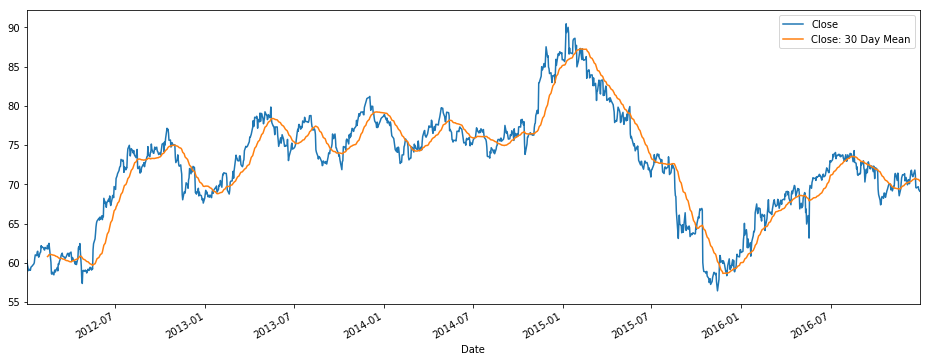

In [7]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

## expanding

Now what if you want to take into account everything from the start of the time series as a rolling value? For instance, not just take into account a period of 7 days, or monthly rolling average, but instead, take into everything since the beginning of the time series, continuously:

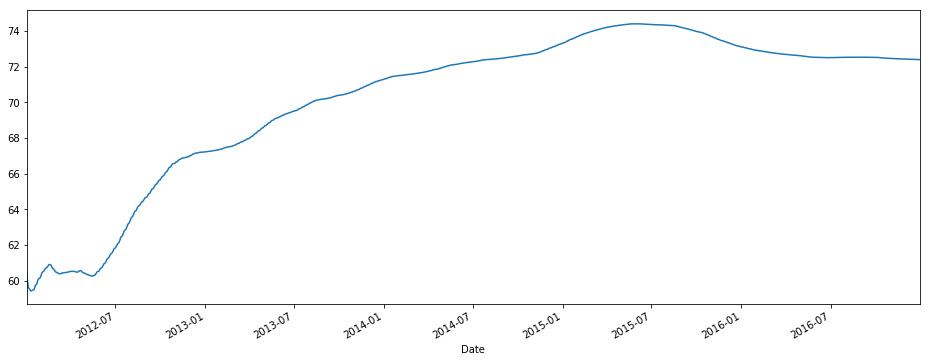

In [8]:
# Optional specify a minimum number of periods
# ogni punto nel plot corrisponde alla media dei valori di tutti i giorni precedenti + quello corrente
df['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

## Bollinger Bands

We will talk a lot more about financial analysis plots and technical indicators, but here is one worth mentioning!

More info : http://www.investopedia.com/terms/b/bollingerbands.asp

*Developed by John Bollinger, Bollinger Bands® are volatility bands placed above and below a moving average. Volatility is based on the standard deviation, which changes as volatility increases and decreases. The bands automatically widen when volatility increases and narrow when volatility decreases. This dynamic nature of Bollinger Bands also means they can be used on different securities with the standard settings. For signals, Bollinger Bands can be used to identify Tops and Bottoms or to determine the strength of the trend.*

*Bollinger Bands reflect direction with the 20-period SMA and volatility with the upper/lower bands. As such, they can be used to determine if prices are relatively high or low. According to Bollinger, the bands should contain 88-89% of price action, which makes a move outside the bands significant. Technically, prices are relatively high when above the upper band and relatively low when below the lower band. However, relatively high should not be regarded as bearish or as a sell signal. Likewise, relatively low should not be considered bullish or as a buy signal. Prices are high or low for a reason. As with other indicators, Bollinger Bands are not meant to be used as a stand alone tool. *

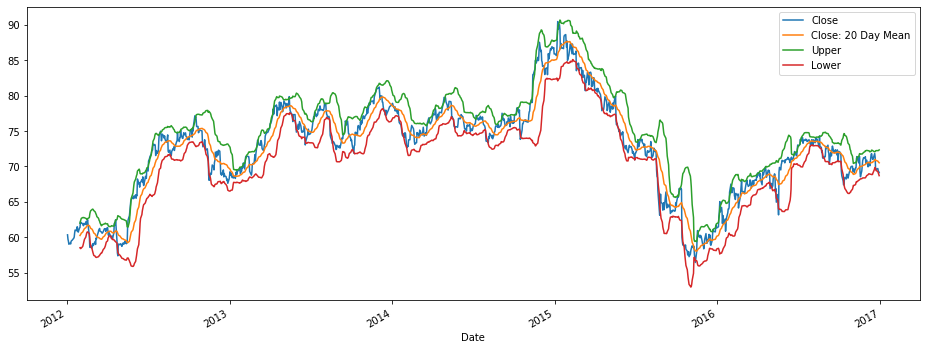

In [8]:
# Close 20 MA
df['Close: 20 Day Mean'] = df['Close'].rolling(window=20).mean()

# Upper = 20MA + 2*std(20)
df['Upper'] = df['Close: 20 Day Mean'] + 2*df['Close'].rolling(window=20).std()

# Lower = 20MA - 2*std(20)
df['Lower'] = df['Close: 20 Day Mean'] - 2*df['Close'].rolling(window=20).std()

# Close
df[['Close','Close: 20 Day Mean','Upper','Lower']].plot(figsize=(16,6))

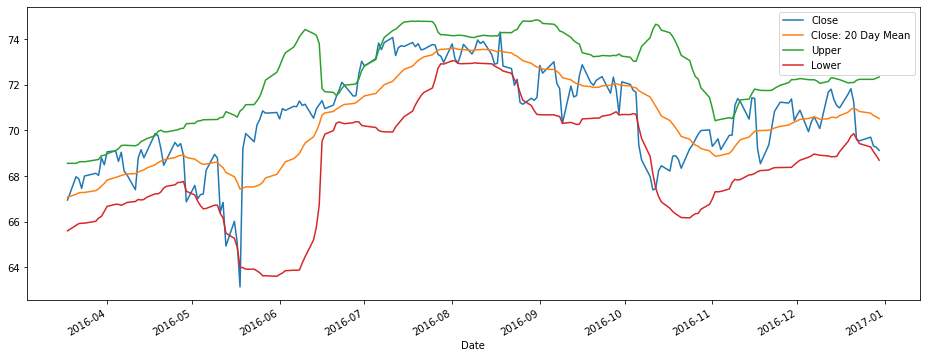

In [9]:
df[['Close','Close: 20 Day Mean','Upper','Lower']].tail(200).plot(figsize=(16,6))

For expanding operations, it doesn't help very much to visualize this against the daily data, but instead its a good way to get an idea of the "stability" of a stock. This idea of stability and volatility is something we are going to be exploring heavily in the next project, so let's jump straight into it!